<a href="https://colab.research.google.com/github/ArtuomMerkulov/ArtuomMerkulov/blob/main/%D0%9A%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F_%D1%81%D0%B0%D0%B9%D1%82%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Классификация текстов**

Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...). Свою копию вы сможете изменять и запускать.



**Импорт библиотек для работы всего ноутбука**

In [ ]:
from google.colab import files # Для работы с файлами 
import numpy as np # Для работы с данными 
import pandas as pd # Для работы с таблицами
import matplotlib.pyplot as plt # Для вывода графиков
import os # Для работы с файлами
%matplotlib inline

from tensorflow.keras import utils # Для работы с категориальными данными
from tensorflow.keras.models import Sequential # Полносвязная модель
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation # Слои для сети
from tensorflow.keras.preprocessing.text import Tokenizer # Методы для работы с текстами и преобразования их в последовательности
from tensorflow.keras.preprocessing.sequence import pad_sequences # Метод для работы с последовательностями

from sklearn.preprocessing import LabelEncoder # Метод кодирования тестовых лейблов
from sklearn.model_selection import train_test_split # Для разделения выборки на тестовую и обучающую
from google.colab import drive # Для работы с Google Drive
import time # Импортируем библиотеку time

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Классификация текстов на базе сайтов


**Загрузка данных**


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Numpy/Датасет категоризация сайтов.csv') #загружаем данные в dataframe
df = df.iloc[:, :2] #извлечём тексты обращений и соответствующие им категории
df.head(10)    #посмотрим на содержимое

,https://infoselection.ru,информационно-развлекательный сайт
0,https://pikabu.ru,информационно-развлекательный сайт
1,https://www.adme.ru,информационно-развлекательный сайт
2,https://pressa.tv,информационно-развлекательный сайт
3,https://www.wikihow.com,информационно-развлекательный сайт
4,https://lifehacker.ru,информационно-развлекательный сайт
5,https://ivanvdovin.ru,информационно-развлекательный сайт
6,https://www.kramola.info,информационно-развлекательный сайт
7,https://lenta.ru,информационно-развлекательный сайт
8,https://infanoj.ru,информационно-развлекательный сайт
9,https://komiinform.ru,информационно-развлекательный сайт


In [ ]:
df.rename(columns={'https://infoselection.ru': 'ссылка', 'информационно-развлекательный сайт': 'сайты'}, inplace=True)
df.head()

,ссылка,сайты
0,https://pikabu.ru,информационно-развлекательный сайт
1,https://www.adme.ru,информационно-развлекательный сайт
2,https://pressa.tv,информационно-развлекательный сайт
3,https://www.wikihow.com,информационно-развлекательный сайт
4,https://lifehacker.ru,информационно-развлекательный сайт


In [ ]:
print(df.shape) #Выведем форму таблицы

(3730, 2)


In [ ]:
print(df.values[0])

['https://pikabu.ru' 'информационно-развлекательный сайт']


**Обучение без фильтрации данных**


In [ ]:
for cl in df['сайты'].unique(): 
  print('Количество записей класса ', cl, ': ', df[df.сайты == cl].shape[0])

Количество записей класса  информационно-развлекательный сайт :  11
Количество записей класса  информационно-правовой сайт :  1
Количество записей класса  образование :  9
Количество записей класса  Образование :  31
Количество записей класса  университет :  17
Количество записей класса  вуз, официальный сайт :  20
Количество записей класса  обучение языкам :  3
Количество записей класса  словарь :  17
Количество записей класса  математика :  9
Количество записей класса  Ветклиника :  17
Количество записей класса  Детский центр :  21
Количество записей класса  одежда для детей :  8
Количество записей класса  ремонт детских колясок :  16
Количество записей класса  криптовалюта :  6
Количество записей класса  инвестиции :  3
Количество записей класса  финансы :  6
Количество записей класса  Финансы :  20
Количество записей класса  новости :  25
Количество записей класса  Новости :  3
Количество записей класса  Объявления :  27
Количество записей класса  магазин канцтоваров :  8
Количеств

In [ ]:
texts = df['ссылка'].values #Извлекаем данные всех текстов из столбца text
classes = list(df['сайты'].values) #Извлекаем соответствующие им значения классов (лейблов) столбца text
maxWordsCount = 5000 #Зададим максимальное количество слов/индексов, учитываемое при обучении текстов

print(df['сайты'].unique()) #Выводим все уникальные значения классов
nClasses = df['сайты'].nunique()+1  #Задаём количество классов, обращаясь к столбцу category и оставляя уникальные значения
print(nClasses) #Посмотрим на количество классов

['информационно-развлекательный сайт' 'информационно-правовой сайт'
 'образование' 'Образование' 'университет' 'вуз, официальный сайт'
 'обучение языкам' 'словарь' 'математика' 'Ветклиника' 'Детский центр'
 'одежда для детей' 'ремонт детских колясок' 'криптовалюта' 'инвестиции'
 'финансы' 'Финансы' 'новости' 'Новости' 'Объявления'
 'магазин канцтоваров' 'магазин' 'доставка еды' 'доставка воды'
 'электронная библиотека' 'автомобильный форум' 'онлайн игры'
 'товары для животных' 'зоомагазин' 'корм для животных'
 'ремонт бытовой техники' 'магазин парфюмерии' 'фильмы' 'опросы'
 'IT-сфера' 'трейдинг' 'эзотерика' 'психология' 'Психология' 'наука'
 'Наука' 'саморазвитие' 'бизнес' 'дизайн' 'дизайн интерьера'
 'компьютерные программы' 'компьюьерные программы' 'работа' 'Работа'
 'поиск работы' 'фриланс' 'биржа фриланса' 'питание' 'Питание'
 'недвижимость' 'Недвижимость' 'медицинская клиника' 'магазин мебели'
 'онлайн-издание' 'музыка' 'Музыка' 'радио' 'сотовая связь'
 'Сотовая связь' 'магазин ко

In [ ]:
#Преобразовываем текстовые данные в числовые/векторные для обучения нейросетью
#Для этого воспользуемся встроенной в Keras функцией Tokenizer для разбиения текста и превращения в матрицу числовых значений
#num_words=maxWordsCount - определяем макс.кол-во слов/индексов, учитываемое при обучении текстов
#filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n' - избавляемся от ненужных символов
#lower=True - приводим слова к нижнему регистру
#split=' ' - разделяем слова по пробелу
#char_level=False - просим токенайзер не удалять однобуквенные слова
tokenizer = Tokenizer(num_words=maxWordsCount, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ', oov_token='unknown', char_level=False)

tokenizer.fit_on_texts(texts) #"Скармливаем" наши тексты, т.е. даём в обработку методу, который соберет словарь частотности

#Формируем матрицу индексов по принципу Bag of Words
xAll = tokenizer.texts_to_matrix(texts) #Каждое слово из текста нашло свой индекс в векторе длиной maxWordsCount и отметилось в нем единичкой 
print(xAll.shape)  #Посмотрим на форму текстов
print(xAll[0, :20])#И отдельно на фрагмент начала вектора

(3730, 5000)
[0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
print(tokenizer.word_index.items()) 

dict_items([('unknown', 1), ('https', 2), ('ru', 3), ('www', 4), ('http', 5), ('com', 6), ('ua', 7), ('net', 8), ('org', 9), ('uk', 10), ('co', 11), ('info', 12), ('рф', 13), ('nn', 14), ('su', 15), ('spb', 16), ('xn', 17), ('shop', 18), ('by', 19), ('apteka', 20), ('online', 21), ('narod', 22), ('pro', 23), ('kiev', 24), ('kz', 25), ('me', 26), ('club', 27), ('sport', 28), ('tula', 29), ('in', 30), ('lviv', 31), ('edu', 32), ('music', 33), ('salon', 34), ('yandex', 35), ('forum', 36), ('eu', 37), ('lib', 38), ('taxi', 39), ('site', 40), ('ws', 41), ('auto', 42), ('blogspot', 43), ('rabota', 44), ('p1ai', 45), ('ucoz', 46), ('tv', 47), ('news', 48), ('beauty', 49), ('e', 50), ('eco', 51), ('i', 52), ('dom', 53), ('de', 54), ('psy', 55), ('travel', 56), ('novgorod', 57), ('nnov', 58), ('pesni', 59), ('gov', 60), ('vip', 61), ('moscow', 62), ('centr', 63), ('remont', 64), ('io', 65), ('aqua', 66), ('today', 67), ('world', 68), ('museum', 69), ('obiz', 70), ('podarki', 71), ('text', 72), 

In [ ]:
print("Размер словаря", len(tokenizer.word_index.items()))

Размер словаря 3841


In [ ]:
#Преобразовываем категории в векторы
encoder = LabelEncoder() # Вызываем метод кодирования тестовых лейблов из библиотеки sklearn
encoder.fit(classes) # Подгружаем в него категории из нашей базы
classesEncoded = encoder.transform(classes) # Кодируем категории
print(encoder.classes_)
print(classesEncoded.shape)
print(classesEncoded[:10])

[' Сайт о рыбалке' 'IT-сфера' 'Аптека' 'Банк' 'Ветклиника'
 'Воспитание детей' 'Выкуп авто' 'Гимнастика' 'Детский центр'
 'Журналистика' 'ЗОЖ' 'Здоровье' 'Зоопарк'
 'Интернет магазин бытовой техники' 'Интернет магазин для охоты и рыбалки'
 'Интернет магазин одежды и обуви' 'Интернет магазин( Ювелирные изделия)'
 'Интернет-магазин одежды и обуви'
 'Интернет-магазин товаров для рукоделия' 'Интернет-магазин(строительный)'
 'Клининг' 'Конный спорт' 'Космос' 'Кулинаные рецепты'
 'Ландшафтный дизайн' 'Магазин семян' 'Маркетинг' 'Массаж' 'Мебель'
 'Медитация' 'Миграция' 'Музей' 'Музей, официальный сайт' 'Музыка' 'Наука'
 'Недвижимость' 'Новости' 'Образование' 'Объявления' 'Оригами'
 'Официальный местный сайт' 'Официальный сайт выставки'
 'Официальный сайт театра' 'Парикмахерская' 'Питание' 'Политика'
 'Продажа и ремонт телефонов' 'Психология' 'Путешествия' 'Работа'
 'Религия' 'Ремонт' 'Ремонт Apple, Beats' 'Ремонт iPhone'
 'Ремонт автомобилей' 'Ремонт квартир и домов'
 'Ремонт телефонов, ноут

In [ ]:
yAll = utils.to_categorical(classesEncoded, nClasses) # И выводим каждый лейбл в виде вектора длиной 22, с 1кой в позиции соответствующего класса и нулями
print(yAll.shape) # Посмотрим на форму лейблов категорий
print(yAll[0]) # И отдельно на первую строку

(3730, 224)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


**Создание обучающей и проверочной выборки**



In [ ]:
xTrain, xVal, yTrain, yVal = train_test_split(xAll, yAll, test_size=0.3, shuffle = True)
print(xTrain.shape) #посмотрим на форму текстов из обучающей выборки
print(yTrain.shape) #и на форму соответсвующих им классов

(2611, 5000)
(2611, 224)


In [ ]:
# для Эмбэддинга представляем текст в виде последовательности индексов слов, каждый из которых затем преобразуем в многомерный вектор
Sequences = tokenizer.texts_to_sequences(texts) #разбиваем текст на последовательность индексов
npSequences = np.array(Sequences)                #переведём в массив numpy
xTrainE, xValE, yTrainE, yValE = train_test_split(npSequences, yAll, test_size=0.3)#сформируем новую форму выборки
print(xTrainE.shape) #посмотрим на форму текстов из обучающей выборки
print(yTrainE.shape)  #и на форму соответствующих им классов

(2611,)
(2611, 224)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  This is separate from the ipykernel package so we can avoid doing imports until


**Нейросеть**


BagOfWords + Dense

Epoch 1/100
21/21 [==============================] - 1s 16ms/step - loss: 5.3876 - accuracy: 0.0100 - val_loss: 5.3176 - val_accuracy: 0.0384
Epoch 2/100
21/21 [==============================] - 0s 10ms/step - loss: 5.1848 - accuracy: 0.0283 - val_loss: 5.0292 - val_accuracy: 0.0384
Epoch 3/100
21/21 [==============================] - 0s 8ms/step - loss: 4.9927 - accuracy: 0.0341 - val_loss: 4.9569 - val_accuracy: 0.0429
Epoch 4/100
21/21 [==============================] - 0s 10ms/step - loss: 4.8659 - accuracy: 0.0463 - val_loss: 4.8948 - val_accuracy: 0.0733
Epoch 5/100
21/21 [==============================] - 0s 8ms/step - loss: 4.7278 - accuracy: 0.0643 - val_loss: 4.8199 - val_accuracy: 0.0643
Epoch 6/100
21/21 [==============================] - 0s 8ms/step - loss: 4.5636 - accuracy: 0.0728 - val_loss: 4.7322 - val_accuracy: 0.0786
Epoch 7/100
21/21 [==============================] - 0s 10ms/step - loss: 4.3856 - accuracy: 0.0873 - val_loss: 4.6830 - val_accuracy: 0.0715
Epoch 8/1

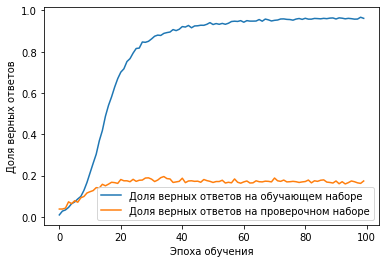

In [ ]:
#Создаём полносвязную сеть
model01 = Sequential()
#Входной полносвязный слой
model01.add(Dense(400, input_dim=maxWordsCount, activation="relu"))
#Слой регуляризации Dropout
model01.add(Dropout(0.4))
#Второй полносвязный слой
model01.add(Dense(250, activation='relu'))
#Слой регуляризации Dropout
model01.add(Dropout(0.4))
#Третий полносвязный слой
model01.add(Dense(100, activation='relu'))
#Слой регуляризации Dropout
model01.add(Dropout(0.4))
#Выходной полносвязный слой
model01.add(Dense(nClasses, activation='softmax'))


model01.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

#Обучаем сеть на выборке
history = model01.fit(xTrain, 
                    yTrain, 
                    epochs=100,
                    batch_size=128,
                    validation_data=(xVal, yVal))

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

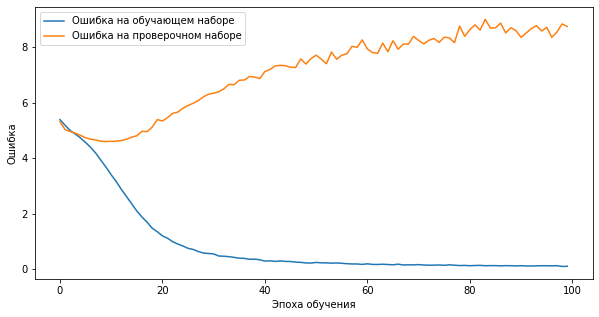

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

**Embedding + Dense**



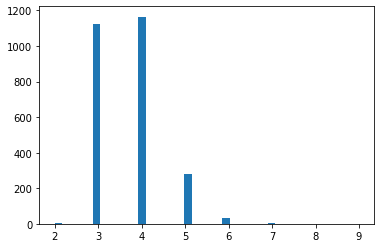

In [ ]:
lenXTrainE = [len(x) for x in xTrainE]
plt.hist(lenXTrainE, 40)
plt.show()

In [ ]:
maxlen = 1000
xTrainE = pad_sequences(xTrainE, maxlen=maxlen) #Преобразуем входные векторы
xValE = pad_sequences(xValE, maxlen=maxlen) #Преобразуем входные векторы

In [ ]:
print(xTrainE.shape)

(2611, 1000)


Epoch 1/50
27/27 [==============================] - 1s 21ms/step - loss: 5.6801 - accuracy: 0.0077 - val_loss: 5.4048 - val_accuracy: 0.0080
Epoch 2/50
27/27 [==============================] - 0s 12ms/step - loss: 5.5886 - accuracy: 0.0092 - val_loss: 5.4036 - val_accuracy: 0.0134
Epoch 3/50
27/27 [==============================] - 0s 12ms/step - loss: 5.5930 - accuracy: 0.0092 - val_loss: 5.4091 - val_accuracy: 0.0134
Epoch 4/50
27/27 [==============================] - 0s 13ms/step - loss: 5.5096 - accuracy: 0.0080 - val_loss: 5.4045 - val_accuracy: 0.0134
Epoch 5/50
27/27 [==============================] - 0s 12ms/step - loss: 5.4873 - accuracy: 0.0111 - val_loss: 5.3874 - val_accuracy: 0.0134
Epoch 6/50
27/27 [==============================] - 0s 13ms/step - loss: 5.4578 - accuracy: 0.0169 - val_loss: 5.3592 - val_accuracy: 0.0134
Epoch 7/50
27/27 [==============================] - 0s 13ms/step - loss: 5.3726 - accuracy: 0.0180 - val_loss: 5.3438 - val_accuracy: 0.0179
Epoch 8/50
27

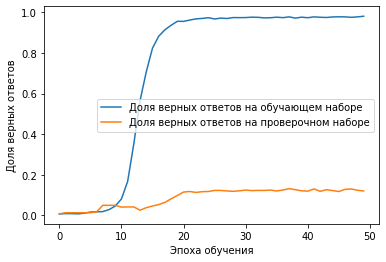

In [ ]:
#Создаём полносвязную сеть
modelE = Sequential()
#Cлой представления всего словаря слов в векторном представлении
modelE.add(Embedding(maxWordsCount, 50, input_length=maxlen))
#Слой регуляризации Dropout
modelE.add(SpatialDropout1D(0.2))
#Cлой преобразования двумерных данных в одномерные
modelE.add(Flatten())
#Слой пакетной нормализации
modelE.add(BatchNormalization())
#Полносвязный слой
modelE.add(Dense(100, activation="relu"))
#Слой регуляризации Dropout
modelE.add(Dropout(0.2))
#Слой пакетной нормализации
modelE.add(BatchNormalization())
#Выходной полносвязный слой
modelE.add(Dense(nClasses, activation='softmax'))

modelE.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

#Обучаем сеть на xTrain
history = modelE.fit(xTrainE, 
                    yTrainE, 
                    epochs=50,
                    batch_size=100,
                    validation_data=(xValE, yValE))


plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

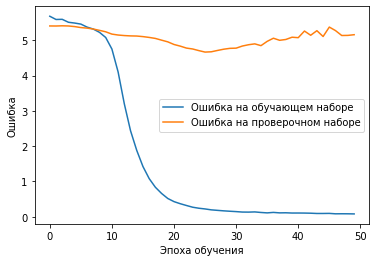

In [ ]:
plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()